In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import circlify

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import HRPOpt

In [2]:
portfolio = pd.read_excel('all_data_finals.xlsx')

# HRP Method
returns = portfolio.pct_change().dropna()
# mu = mean_historical_return(returns)
# S = CovarianceShrinkage(returns).ledoit_wolf()
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

# # Basic waffle
# plt.figure(
#     FigureClass=Waffle,
#     rows=5,
#     columns=20,
#     values=hrp_weights,
#     legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
# )
# plt.show()

Expected annual return: 26.7%
Annual volatility: 12.4%
Sharpe Ratio: 1.99
{'10Y Bond': 0.010541663974010256, '2Y Bond': 0.006436230141586346, '2Y German': 0.04130920553734252, 'Copper': 0.02346036343243439, 'Crude Oil': 0.016265958155106616, 'EUR/USD': 0.2707991344093338, 'Iron Ore': 0.10380502396608707, 'NLR': 0.0003727681097262014, 'SOXX': 0.01220161799914995, 'Soybean': 0.06681359374817741, 'USD/JPY': 0.4018007750005288, 'VFH': 0.008934272436432222, 'VTV': 0.016605202512979558, 'VWO': 0.020654190577104867}


c:\Users\jyin1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.60603601 0.60603601 0.60603601 0.60603601 0.60603601 0.60603601
 0.60603601]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


In [ ]:
weights = {'10Y Bond': 0.010541663974010256,
            '2Y Bond': 0.006436230141586346,
            '2Y German': 0.04130920553734252,
            'Copper': 0.02346036343243439,
            'Crude Oil': 0.016265958155106616,
            'EUR/USD': 0.2707991344093338,
            'Iron Ore': 0.10380502396608707,
            'NLR': 0.0003727681097262014,
            'SOXX': 0.01220161799914995,
            'Soybean': 0.06681359374817741,
            'USD/JPY': 0.4018007750005288,
            'VFH': 0.008934272436432222,
            'VTV': 0.016605202512979558,
            'VWO': 0.020654190577104867
}

tiered_weights = [{ 'id': 'Portfolio', 'datum': 1.0, 'children' : [
                        {'id': 'Fixed Income', 'datum': 0.05828709965, 
                    'children' : [
                                    {'id':'10Y Bonds', 'datum': 0.006436230141586346}, 
                                    {'id': '2Y Bonds', 'datum': 0.010541663974010256}, 
                                    {'id': '2Y German Bunds', 'datum': 0.04130920553734252}
                                ]},
                    {'id': 'Commodities', 'datum': 0.2103449393, 
                    'children' : [
                                    {'id': 'Copper', 'datum': 0.02346036343243439}, 
                                    {'id': 'Crude Oil', 'datum': 0.06681359374817741}, 
                                    {'id': 'Iron Ore', 'datum': 0.10380502396608707}, 
                                    {'id': 'Soybeans', 'datum': 0.016265958155106616}
                                ]},
                    {'id': 'Foreign Exchange', 'datum': 0.6725999094, 
                    'children' : [
                                    {'id': 'EUR/USD', 'datum': 0.4018007750005288}, 
                                    {'id': 'USD/JPY', 'datum': 0.2707991344093338}
                                ]},
                    {'id': 'Equities', 'datum': 0.05876805164, 
                    'children' : [
                                    {'id': 'NLR', 'datum': 0.020654190577104867}, 
                                    {'id': 'SOXX', 'datum': 0.01220161799914995}, 
                                    {'id': 'VFH', 'datum': 0.008934272436432222}, 
                                    {'id': 'VTV', 'datum': 0.016605202512979558}, 
                                    {'id': 'VWO', 'datum': 0.0003727681097262014}
                                ]}
                    ]}]

In [ ]:
# create circle plot

circles = circlify.circlify(
    tiered_weights,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

for circle in circles:
    print(circle)

# configure data plot
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Portfolio Weightings')
ax.axis('off')
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color=(55/255, 66/255, 174/255)))
    plt.annotate(label, (x, y), ha='center', color="black")

# Labels for the asset classes
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    pos = [x, y]
    if label == "Equities":
        pos = [x + 0.08, y - 0.08]
    elif label == "Fixed Income":
        pos = [x, y - 0.08]
    elif label == "Commodities":
        pos = [x, y - 0.08]
    plt.annotate(label, (pos[0], pos[1]), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

In [18]:
weights = {'10Y Bond': 0.010541663974010256,
            '2Y Bond': 0.006436230141586346,
            '2Y German': 0.04130920553734252,
            'Copper': 0.02346036343243439,
            'Crude Oil': 0.016265958155106616,
            'EUR/USD': 0.2707991344093338,
            'Iron Ore': 0.10380502396608707,
            'NLR': 0.0003727681097262014,
            'SOXX': 0.01220161799914995,
            'Soybean': 0.06681359374817741,
            'USD/JPY': 0.4018007750005288,
            'VFH': 0.008934272436432222,
            'VTV': 0.016605202512979558,
            'VWO': 0.020654190577104867
}

clean_data = [{'id': 'Fixed Income', 'datum': 0.05828709965, 
                    'children' : [
                                    {'id':'10Y Bonds', 'datum': 0.006436230141586346}, 
                                    {'id': '2Y Bonds', 'datum': 0.010541663974010256}, 
                                    {'id': '2Y German Bunds', 'datum': 0.04130920553734252}
                                ]},
                    {'id': 'Commodities', 'datum': 0.2103449393, 
                    'children' : [
                                    {'id': 'Soybeans', 'datum': 0.016265958155106616},
                                    {'id': 'Copper', 'datum': 0.02346036343243439}, 
                                    {'id': 'Crude Oil', 'datum': 0.06681359374817741}, 
                                    {'id': 'Iron Ore', 'datum': 0.10380502396608707}
                                ]},
                    {'id': 'Foreign Exchange', 'datum': 0.6725999094, 
                    'children' : [
                                    {'id': 'USD/JPY', 'datum': 0.2707991344093338},
                                    {'id': 'EUR/USD', 'datum': 0.4018007750005288}
                                    
                                ]},
                    {'id': 'Equities', 'datum': 0.05876805164, 
                    'children' : [
                                    {'id': 'VWO', 'datum': 0.0003727681097262014},
                                    {'id': 'VFH', 'datum': 0.008934272436432222}, 
                                    {'id': 'SOXX', 'datum': 0.01220161799914995}, 
                                    {'id': 'VTV', 'datum': 0.016605202512979558},
                                    {'id': 'NLR', 'datum': 0.020654190577104867} 
                                ]}
                    ]

['10Y Bonds', '2Y Bonds', '2Y German Bunds']
[0.006436230141586346, 0.010541663974010256, 0.04130920553734252]
['Copper', 'Crude Oil', 'Iron Ore', 'Soybeans']
[0.02346036343243439, 0.06681359374817741, 0.10380502396608707, 0.016265958155106616]
['USD/JPY', 'EUR/USD']
[0.2707991344093338, 0.4018007750005288]
['VWO', 'SOXX', 'VFH', 'VTV', 'NLR']
[0.0003727681097262014, 0.01220161799914995, 0.008934272436432222, 0.016605202512979558, 0.020654190577104867]


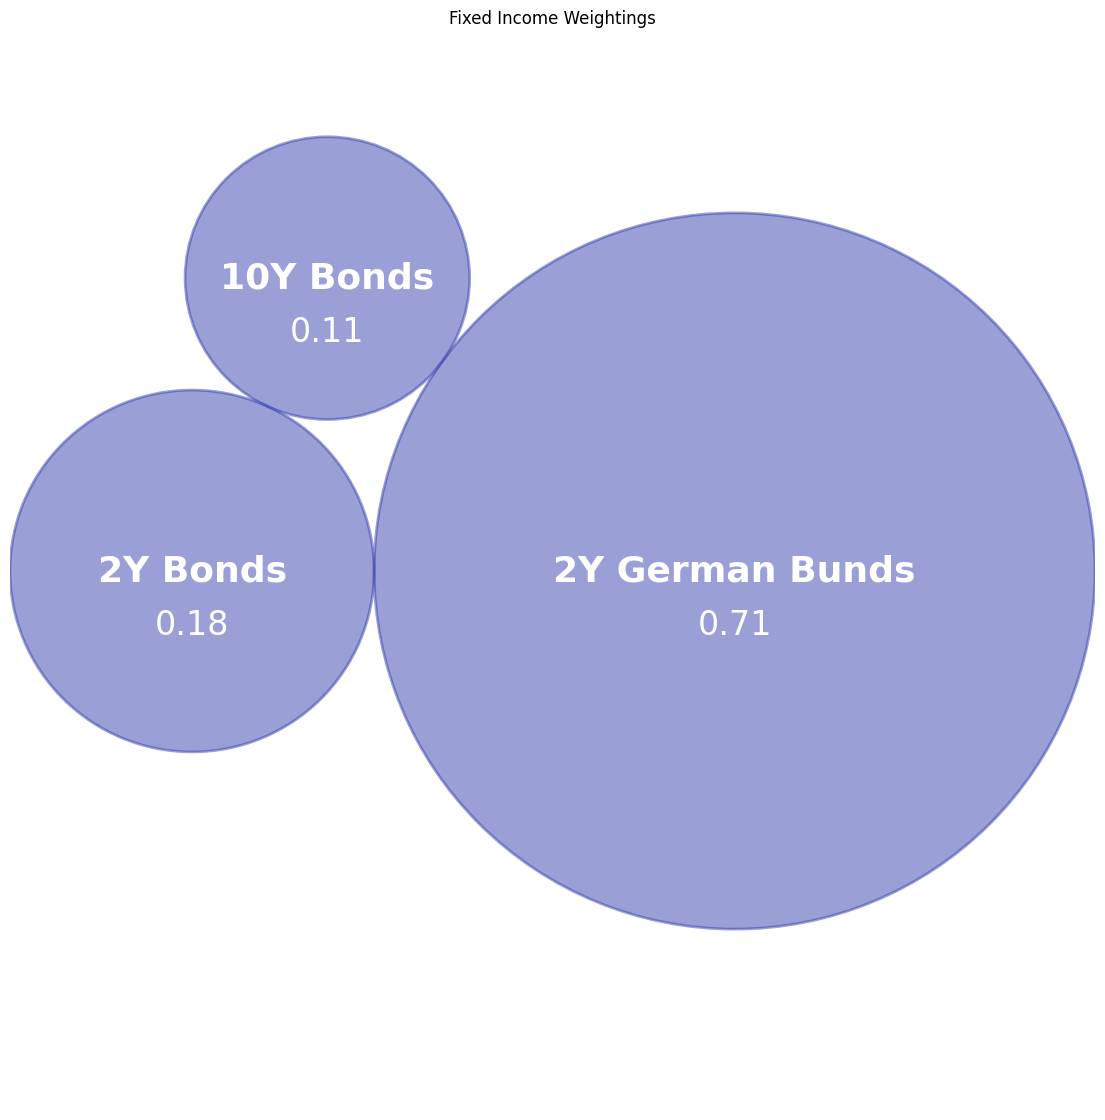

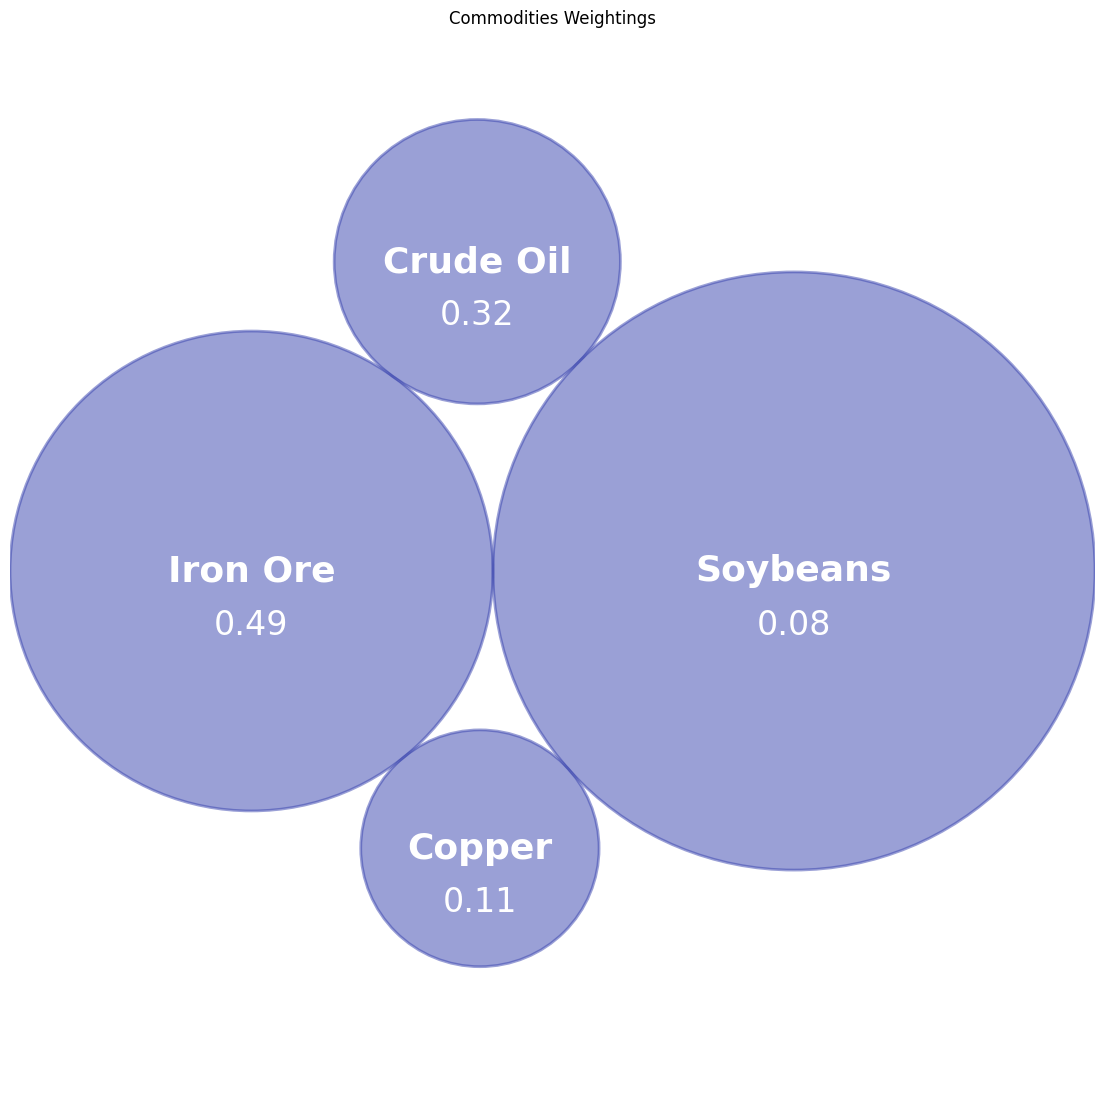

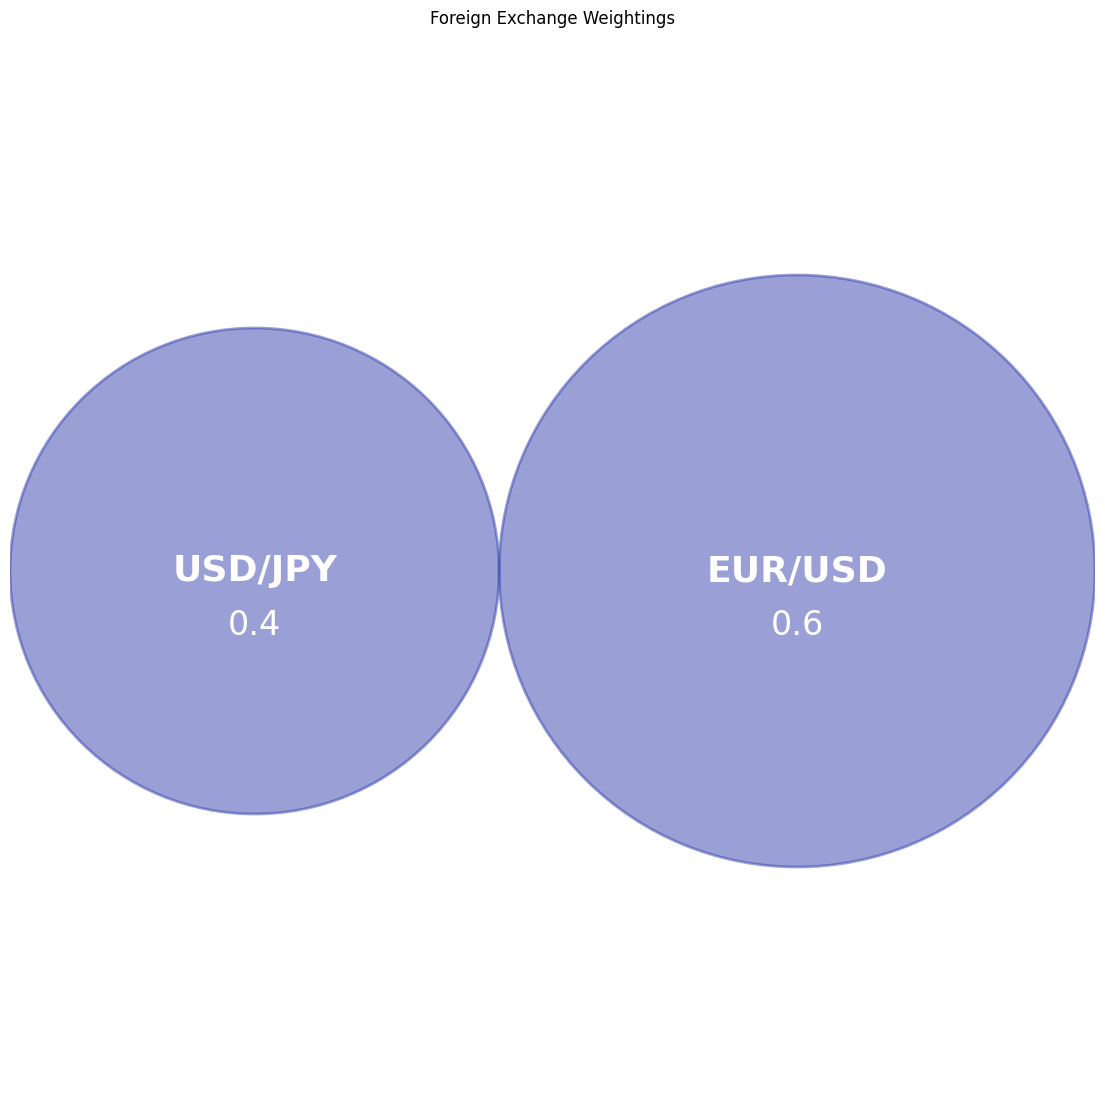

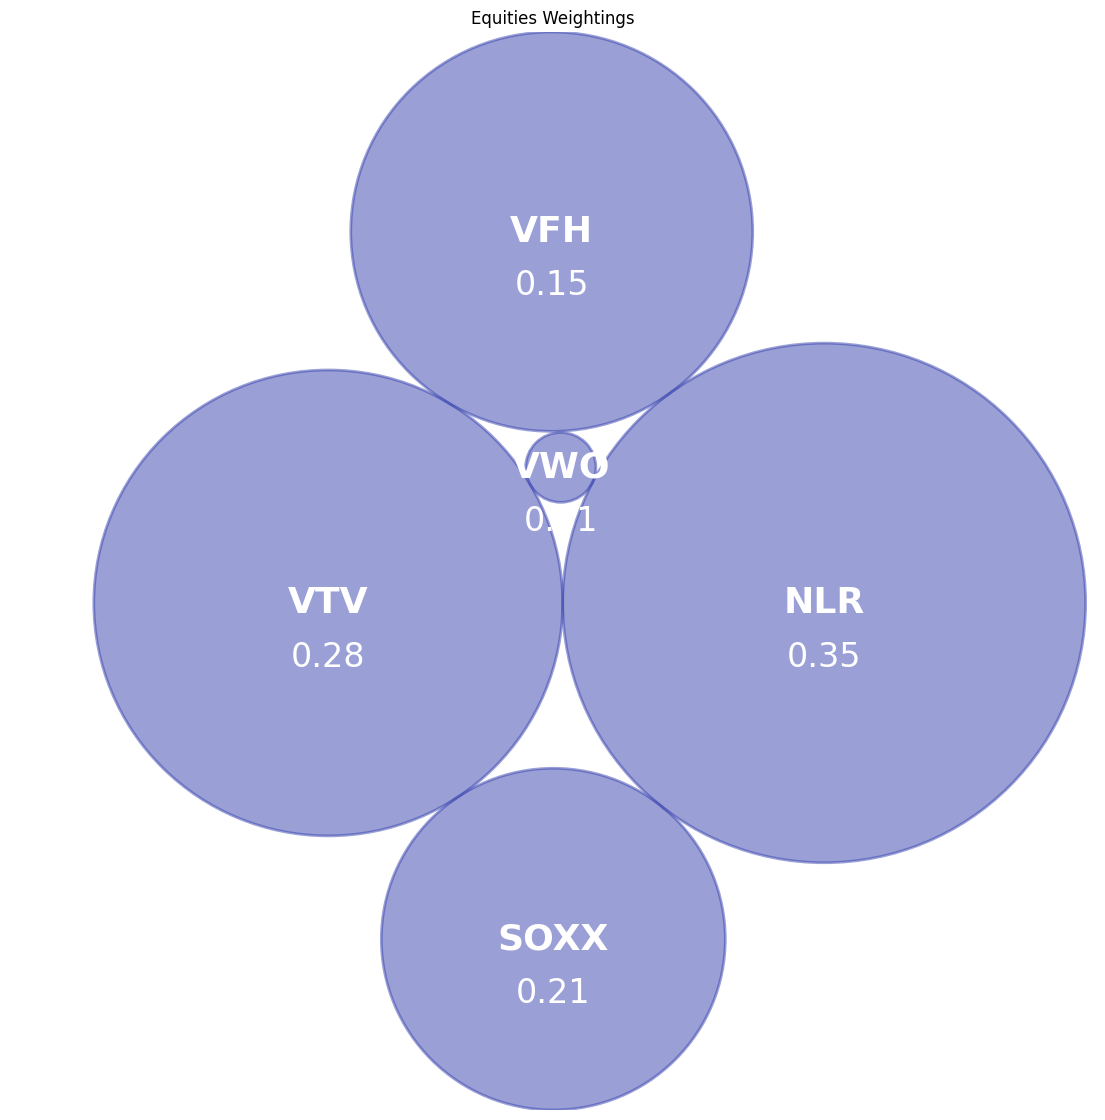

In [17]:
# create circle plot

for asset_class in clean_data:
    child_data = asset_class['children']
    overall_weight = asset_class['datum']
    names = []
    values = []
    weights = []
    for asset in child_data:
        names.append(asset['id'])
        values.append(asset['datum'])
        weights.append(round(asset['datum'] / overall_weight, 2))
    print(names)
    print(values)
    circles = circlify.circlify(
        values,
        show_enclosure=False,
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )
    # configure data plot
    fig, ax = plt.subplots(figsize=(14, 14))
    ax.set_title(f'{asset_class["id"]} Weightings')
    ax.axis('off')
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    for circle, label, weight in zip(circles, names, weights):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color=(55/255, 66/255, 174/255), fill=True))
        plt.annotate(
            label,
            (x, y),
            va='center',
            ha='center',
            color='white',  
            fontsize=26,    
            fontweight='bold',
        )
        plt.annotate(
            weight,
            (x, y - 0.1),
            va='center',
            ha='center',
            color='white',  
            fontsize=24,    
        )

In [ ]:
import numpy as np

def _get_cluster_var(cov, cluster_items):
    # Compute variance per cluster
    cov_slice = cov.loc[cluster_items, cluster_items]
    weights = 1 / np.diag(cov_slice)  # Inverse variance weights
    weights /= weights.sum()
    return np.linalg.multi_dot((weights, cov_slice, weights))